<a href="https://colab.research.google.com/github/carlxx02/Analysis/blob/main/Bank_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bank Customer Churn Analysis**

Data source: https://mavenanalytics.io/data-playground/bank-customer-churn

Install & Import Libraries

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

Upload Dataset

In [18]:
#upload file
from google.colab import files
uploaded = files.upload()

Saving Bank_Churn.csv to Bank_Churn (1).csv


Load CSV

In [19]:
df = pd.read_csv("Bank_Churn.csv")
#quick data inspection
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Dataset Overview

In [21]:
#basic data overview
df.info()
#Basic statistics
df.describe()
#Check missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0


In [22]:
#churn distribution
df['Exited'].value_counts()
df['Exited'].value_counts(normalize=True)*100



,proportion
Exited,
0,79.63
1,20.37


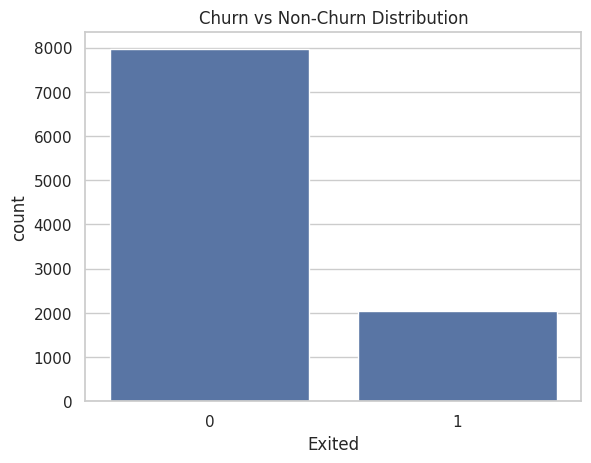

In [23]:
#visualize
sns.countplot(data=df, x='Exited')
plt.title("Churn vs Non-Churn Distribution")
plt.show()


Compare Churners vs Non Churners

In [24]:

df.groupby('Exited')[['CreditScore','Age','Balance','NumOfProducts','IsActiveMember','HasCrCard']].mean()


,CreditScore,Age,Balance,NumOfProducts,IsActiveMember,HasCrCard
Exited,,,,,,
0,651.853196,37.408389,72745.296779,1.544267,0.554565,0.707146
1,645.351497,44.837997,91108.539337,1.475209,0.360825,0.699067


Country-Level Behavior

In [25]:
df.groupby('Geography')[['Balance','Age','NumOfProducts','IsActiveMember','CreditScore','Exited']].mean()


,Balance,Age,NumOfProducts,IsActiveMember,CreditScore,Exited
Geography,,,,,,
France,62092.636516,38.511767,1.530913,0.516753,649.668329,0.161548
Germany,119730.116134,39.771622,1.519729,0.497409,651.453567,0.324432
Spain,61818.147763,38.890997,1.539362,0.529673,651.333872,0.166734


Churn rate by Geography Visualization

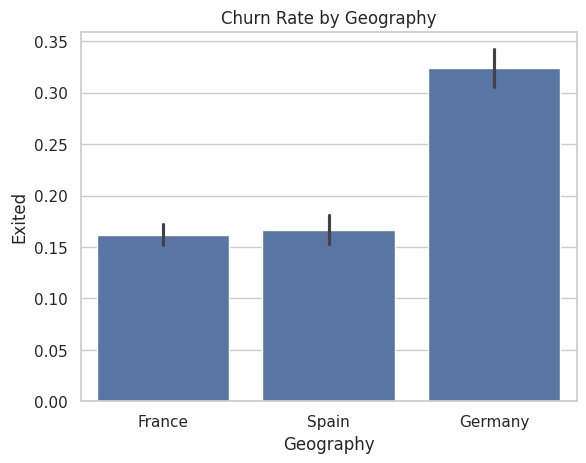

In [26]:
sns.barplot(data=df, x='Geography', y='Exited')
plt.title("Churn Rate by Geography")
plt.show()

Demographic Profile Summary

In [27]:
demo = {
    "Average Age": df['Age'].mean(),
    "Average Credit Score": df['CreditScore'].mean(),
    "Average Balance": df['Balance'].mean(),
    "Male %": (df[df['Gender']=="Male"].shape[0] / len(df)) * 100,
    "Female %": (df[df['Gender']=="Female"].shape[0] / len(df)) * 100,
    "Germany %": (df[df['Geography']=="Germany"].shape[0] / len(df)) * 100,
    "France %": (df[df['Geography']=="France"].shape[0] / len(df)) * 100,
    "Spain %": (df[df['Geography']=="Spain"].shape[0] / len(df)) * 100
}
pd.DataFrame(demo, index=["Value"])


,Average Age,Average Credit Score,Average Balance,Male %,Female %,Germany %,France %,Spain %
Value,38.9218,650.5288,76485.889288,54.57,45.43,25.09,50.14,24.77


Customer Segmentation

In [28]:

df['BalanceSegment'] = pd.cut(
    df['Balance'],
    bins=[-1, 0.1, 50000, 100000, 200000],
    labels=['Zero','Low','Medium','High']
)

df['BalanceSegment'].value_counts()


,count
BalanceSegment,
High,4765
Zero,3617
Medium,1509
Low,75


Credit Score Risk Segment

In [29]:
df['RiskSegment'] = pd.cut(
    df['CreditScore'],
    bins=[0, 600, 750, 900],
    labels=['High Risk', 'Medium Risk', 'Low Risk']
)

df['RiskSegment'].value_counts()


,count
RiskSegment,
Medium Risk,5336
High Risk,3066
Low Risk,1598


Visualization of Segments

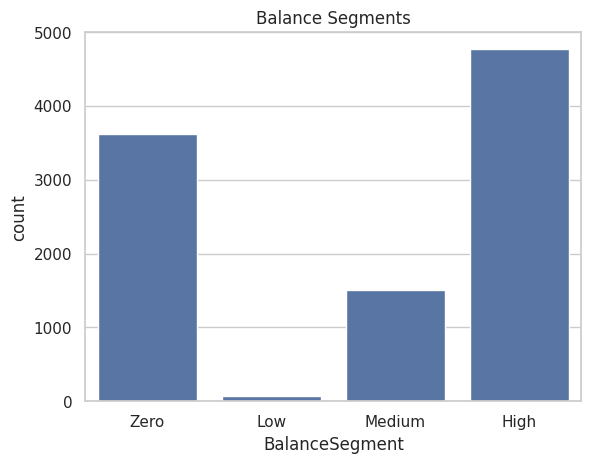

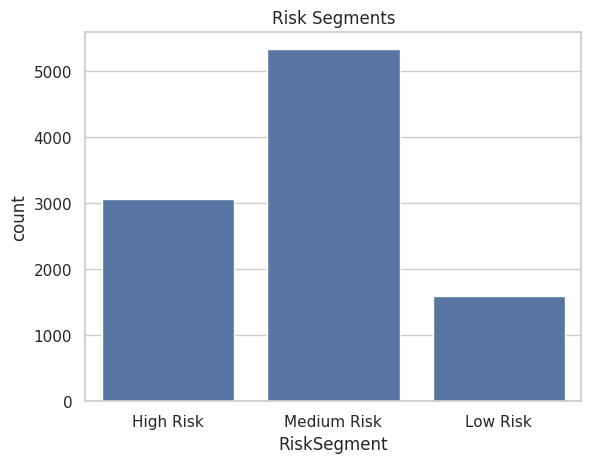

In [30]:
sns.countplot(data=df, x='BalanceSegment')
plt.title("Balance Segments")
plt.show()

sns.countplot(data=df, x='RiskSegment')
plt.title("Risk Segments")
plt.show()


Correlation Heatmap

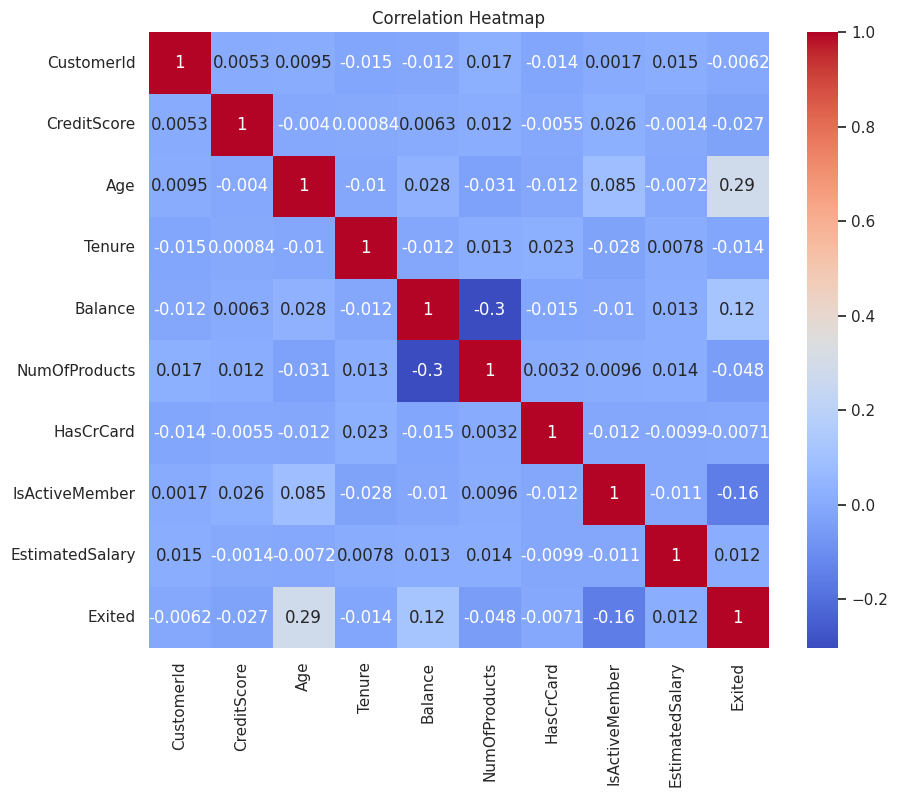

In [33]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


The correlation analysis shows that churn is most strongly associated with customer age, activity level, and account balance.
Older, inactive customers with higher balances exhibit higher churn risk.
Variables like credit score, salary, and tenure have minimal predictive value.

These findings indicate that churn in this dataset is behavior-driven and engagement-driven, rather than demographic or financial-score driven.

Insights Summary


In [32]:
df.groupby('Exited')[['Age','Balance','NumOfProducts','IsActiveMember','CreditScore']].mean()


,Age,Balance,NumOfProducts,IsActiveMember,CreditScore
Exited,,,,,
0,37.408389,72745.296779,1.544267,0.554565,651.853196
1,44.837997,91108.539337,1.475209,0.360825,645.351497


What attributes are more common among churners than non-churners?
**-Churners are older, less engaged, and hold higher balances, making churn a behavior-driven issue rather than demographic or credit-based.**
Can churn be predicted using the variables in the data?
Yes,
Churn prediction is feasible, but the dataset’s drivers are mostly behavioral (activity) and financial profile-related (age & balance) rather than demographic or credit-related.

What do the overall demographics of the bank's customers look like?
Mid-aged, with a large portion in their early 30s to mid-40s
Moderate credit scores (mostly 600–700 range)
Balanced across genders, with no strong churn difference between them
Majority having stable balances and salaries
Mostly maintaining 1–2 banking products.

Is there a difference between German, French, and Spanish customers in terms of account behavior?
German customers exhibit higher-risk behavior, while French customers are the most stable and retained segment.

What types of segments exist within the bank's customers?
High-Value, High-Risk: Older, high balance, inactive, likely German -> priority for retention.

Stable Mid-Income Loyalists: Mid-aged, moderate balance, active, typically French -> low churn, upsell potential.

Young Low-Balance: Younger, low balance, few products -> growth opportunities.

Multi-Product Customers: 2+ products, low churn -> encourage expansion.